<a href="https://colab.research.google.com/github/raj-dandangi/ds_dandangi_raj-PrimeTradeAI-/blob/main/ds_assignment_notebook_2(Primetrade_aI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import auth
import gspread
from google.auth import default

# Authenticate with Google Drive and Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
file_path = '/content/drive/MyDrive/Primetrade.ai(knit.finance)-ds-assignment/ds_(dandangiRaj_dandangirajda@gmail.com)/CSV_Files/fear_greed_index.gsheet'
sheet_name = file_path.split('/')[-1].replace('.gsheet', '')
sh = gc.open(sheet_name)
worksheet = sh.sheet1
data = worksheet.get_all_values()

# Convert the list of lists to a pandas DataFrame
df_fgi = pd.DataFrame(data[1:], columns=data[0])

# Display the first 10 rows of the DataFrame
display(df_fgi.head(10))

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
5,1517895000,8,Extreme Fear,2018-02-06
6,1517981400,36,Fear,2018-02-07
7,1518067800,30,Fear,2018-02-08
8,1518154200,44,Fear,2018-02-09
9,1518240600,54,Neutral,2018-02-10


In [ ]:
df_fgi.shape

(2644, 4)

In [ ]:
df_fgi.dtypes

,0
timestamp,object
value,object
classification,object
date,object


In [ ]:
df_fgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   object
 1   value           2644 non-null   object
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: object(4)
memory usage: 82.8+ KB


# data cleaning and handling
finding null and missing values

In [ ]:
df_fgi.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [ ]:
print(df_fgi[df_fgi.isnull().all(axis=1)])

Empty DataFrame
Columns: [timestamp, value, classification, date]
Index: []


In [ ]:
# Check unique values in each column for unexpected placeholders
for i in df_fgi:
  print(f"column name {i}:, unique values {df_fgi[i].unique()}")


column name timestamp:, unique values ['1517463000' '1517549400' '1517635800' ... '1745991000' '1746077400'
 '1746163800']
column name value:, unique values ['30' '15' '40' '24' '11' '8' '36' '44' '54' '31' '42' '35' '55' '71' '67'
 '74' '63' '39' '33' '37' '41' '38' '47' '56' '59' '32' '29' '28' '18'
 '12' '16' '22' '17' '19' '20' '21' '23' '26' '25' '64' '61' '52' '62'
 '53' '27' '34' '43' '46' '49' '48' '14' '13' '51' '9' '10' '65' '69' '58'
 '50' '57' '60' '68' '66' '76' '75' '78' '77' '70' '73' '80' '84' '83'
 '82' '81' '87' '95' '92' '79' '72' '45' '5' '90' '88' '86' '89' '91' '94'
 '93' '7' '6']
column name classification:, unique values ['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']
column name date:, unique values ['2018-02-01' '2018-02-02' '2018-02-03' ... '2025-04-30' '2025-05-01'
 '2025-05-02']


did not found any null or missing values but to make sure

In [ ]:
df_fgi.replace('', np.nan, inplace=True) # Example for empty strings

# Convert Data Types:

In [ ]:
df_fgi.dtypes

,0
timestamp,object
value,object
classification,object
date,object


In [ ]:
# Convert 'timestamp' to integer (may be Unix timestamps)
# Handle potential conversion errors if non-numeric strings exist
df_fgi['timestamp'] = pd.to_numeric(df_fgi['timestamp'], errors='coerce')

# Convert 'value' to integer
df_fgi['value'] = pd.to_numeric(df_fgi['value'], errors='coerce').astype('Int64') # Int64 handles NaN

# Convert 'date' to datetime
df_fgi['date'] = pd.to_datetime(df_fgi['date'], errors='coerce')

# Check data types after conversion
print(df_fgi.dtypes)

timestamp                  int64
value                      Int64
classification            object
date              datetime64[ns]
dtype: object


Handle Rows with Missing Values in Key Columns:


In [ ]:
print(df_fgi.isnull().sum())

timestamp         0
value             0
classification    0
date              0
dtype: int64


Check for Duplicates:


In [ ]:
# Check for duplicates based on 'timestamp' (most unique identifier)
duplicates_timestamp = df_fgi[df_fgi.duplicated(subset=['timestamp'], keep=False)]
print(f"Potential duplicates based on timestamp:\n{duplicates_timestamp}")

# Check for duplicates based on 'date'
duplicates_date = df_fgi[df_fgi.duplicated(subset=['date'], keep=False)]
print(f"Potential duplicates based on date:\n{duplicates_date}")

Potential duplicates based on timestamp:
Empty DataFrame
Columns: [timestamp, value, classification, date]
Index: []
Potential duplicates based on date:
Empty DataFrame
Columns: [timestamp, value, classification, date]
Index: []


In [ ]:
# Sort by timestamp
df_fgi.sort_values(by='timestamp', inplace=True)

# Reset index after sorting/dropping rows
df_fgi.reset_index(drop=True, inplace=True)

# EDA :
getting information about dataset
Explore Data Characteristics

Perform univariate analysis: summary statistics (mean, median, mode), distribution analysis using histograms or box plots.

Conduct bivariate and multivariate analysis to understand relationships using scatter plots or correlation matrices

In [ ]:
df_fgi.describe()

,timestamp,value,date
count,2.644000e+03,2644.0,2644
mean,1.631899e+09,46.981089,2021-09-17 11:44:45.022692864
min,1.517463e+09,5.0,2018-02-01 00:00:00
25%,1.574811e+09,28.0,2019-11-26 18:00:00
50%,1.631900e+09,46.0,2021-09-17 12:00:00
75%,1.688989e+09,66.0,2023-07-10 06:00:00
max,1.746164e+09,95.0,2025-05-02 00:00:00
std,6.597967e+07,21.82768,NaN


In [ ]:
print("\nSummary Statistics for 'value':")
print(df_fgi['value'].describe())


Summary Statistics for 'value':
count       2644.0
mean     46.981089
std       21.82768
min            5.0
25%           28.0
50%           46.0
75%           66.0
max           95.0
Name: value, dtype: Float64


In [ ]:
mode_value = df_fgi['value'].mode()
print(f"Mode of 'value': {mode_value.iloc[0]}")


Mode of 'value': 50


In [ ]:
df_fgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   Int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), int64(1), object(1)
memory usage: 85.3+ KB


2. Distribution Analysis for 'value'

count       2644.0
mean     46.981089
std       21.82768
min            5.0
25%           28.0
50%           46.0
75%           66.0
max           95.0
Name: value, dtype: Float64


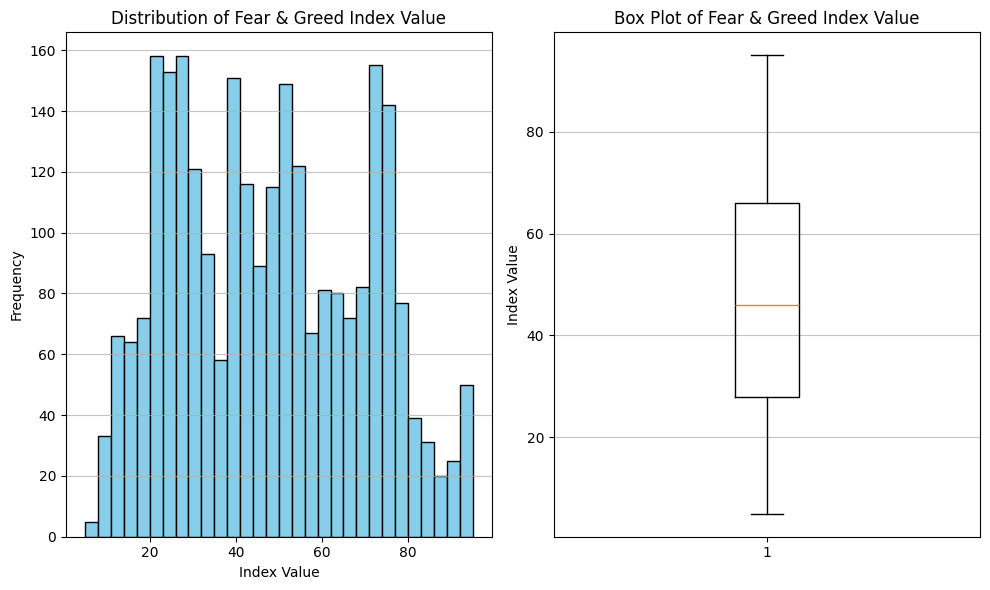

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'value' column is numeric, coercing errors
numeric_values = pd.to_numeric(df_fgi['value'], errors='coerce').dropna()

plt.figure(figsize=(10, 6))
# Histogram
plt.subplot(1, 2, 1)
plt.hist(numeric_values, bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Fear & Greed Index Value')
plt.xlabel('Index Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
print(numeric_values.describe())
# Box Plot
plt.subplot(1, 2, 2)
plt.boxplot(numeric_values)
plt.title('Box Plot of Fear & Greed Index Value')
plt.ylabel('Index Value')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

The histogram shows the frequency of different index values. It appears to be somewhat skewed, with a peak around the neutral range (40-60) and tails extending towards both the 'Extreme Fear' (lower values) and 'Extreme Greed' (higher values) ends.

The box plot provides a summary of the distribution. It shows the median value, the interquartile range (the box), and potential outliers (individual points outside the whiskers). This plot helps visualize the spread and central tendency of the data, confirming the range of values and potentially highlighting any extreme values.

Time Series Aspect (Date)

In [ ]:

print("\nDate Range:")
print(f"Start Date: {df_fgi['date'].min()}")
print(f"End Date: {df_fgi['date'].max()}")
print(f"Number of Unique Dates: {df_fgi['date'].nunique()}")
print(f"Total Rows: {len(df_fgi)}")
# This helps confirm if we have one entry per day or multiple/missing.


Date Range:
Start Date: 2018-02-01 00:00:00
End Date: 2025-05-02 00:00:00
Number of Unique Dates: 2644
Total Rows: 2644


# --- Bivariate & Multivariate Analysis ---



--- Bivariate & Multivariate Analysis ---


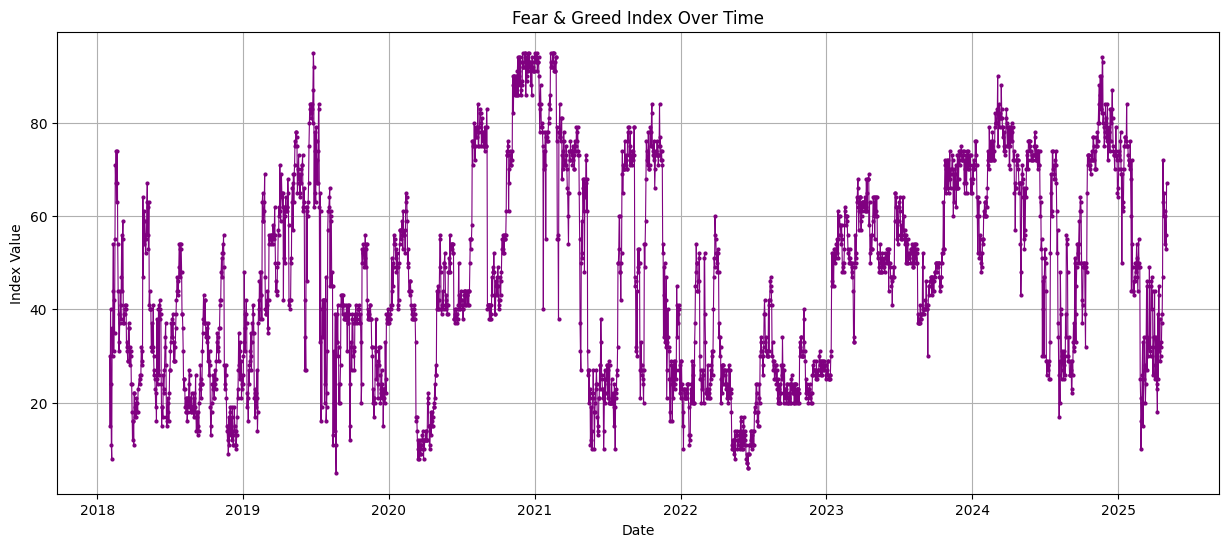

In [ ]:
print("\n--- Bivariate & Multivariate Analysis ---")

# 1. Value over Time (Time Series Plot)
plt.figure(figsize=(15, 6))
plt.plot(df_fgi['date'], df_fgi['value'], marker='o', linestyle='-', markersize=2, linewidth=0.8, color='purple')
plt.title('Fear & Greed Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True)

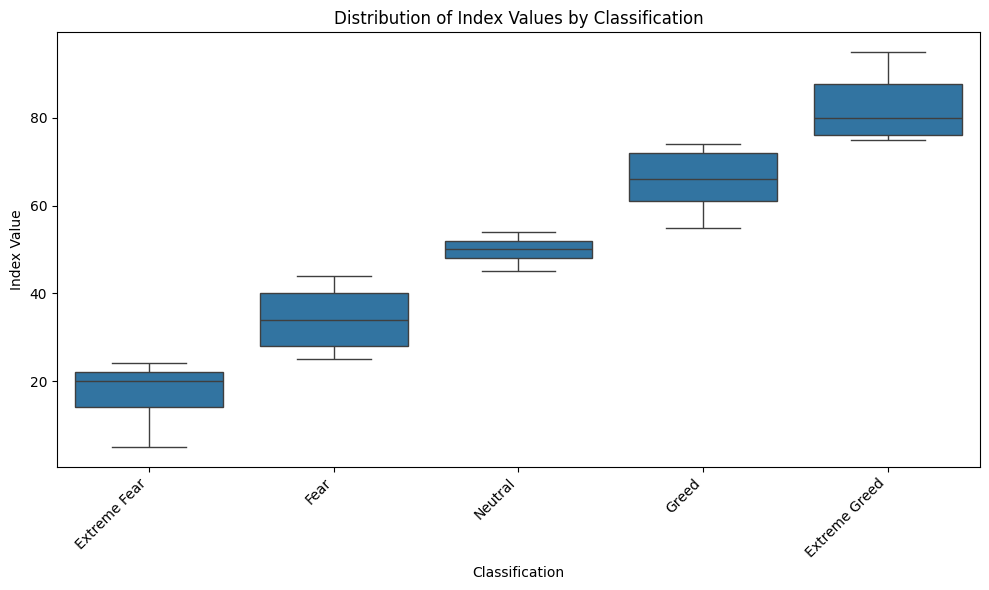

In [ ]:
# This shows the distribution of numerical values within each category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_fgi, x='classification', y='value', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('Distribution of Index Values by Classification')
plt.xlabel('Classification')
plt.ylabel('Index Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Correlation matrix for numerical columns

In [ ]:
# Reset the index to ensure 'date' is a column before setting it as the index
df_fgi.reset_index(inplace=True)

df_fgi.set_index('date', inplace=True) # Set date as index for easier time-based operations

# Ensure 'value' column is numeric, coercing errors
df_fgi['value'] = pd.to_numeric(df_fgi['value'], errors='coerce')

df_fgi['value_7day_avg'] = df_fgi['value'].rolling(window=7).mean()
df_fgi['value_30day_avg'] = df_fgi['value'].rolling(window=30).mean()
df_fgi['daily_change'] = df_fgi['value'].diff()

In [ ]:
numerical_cols = ['value', 'value_7day_avg', 'value_30day_avg', 'daily_change']
corr_matrix = df_fgi[numerical_cols].corr()
print("\nCorrelation Matrix of Numerical Features:")
print(corr_matrix)


Correlation Matrix of Numerical Features:
                    value  value_7day_avg  value_30day_avg  daily_change
value            1.000000        0.947254         0.824945      0.150260
value_7day_avg   0.947254        1.000000         0.894463     -0.056245
value_30day_avg  0.824945        0.894463         1.000000     -0.049462
daily_change     0.150260       -0.056245        -0.049462      1.000000


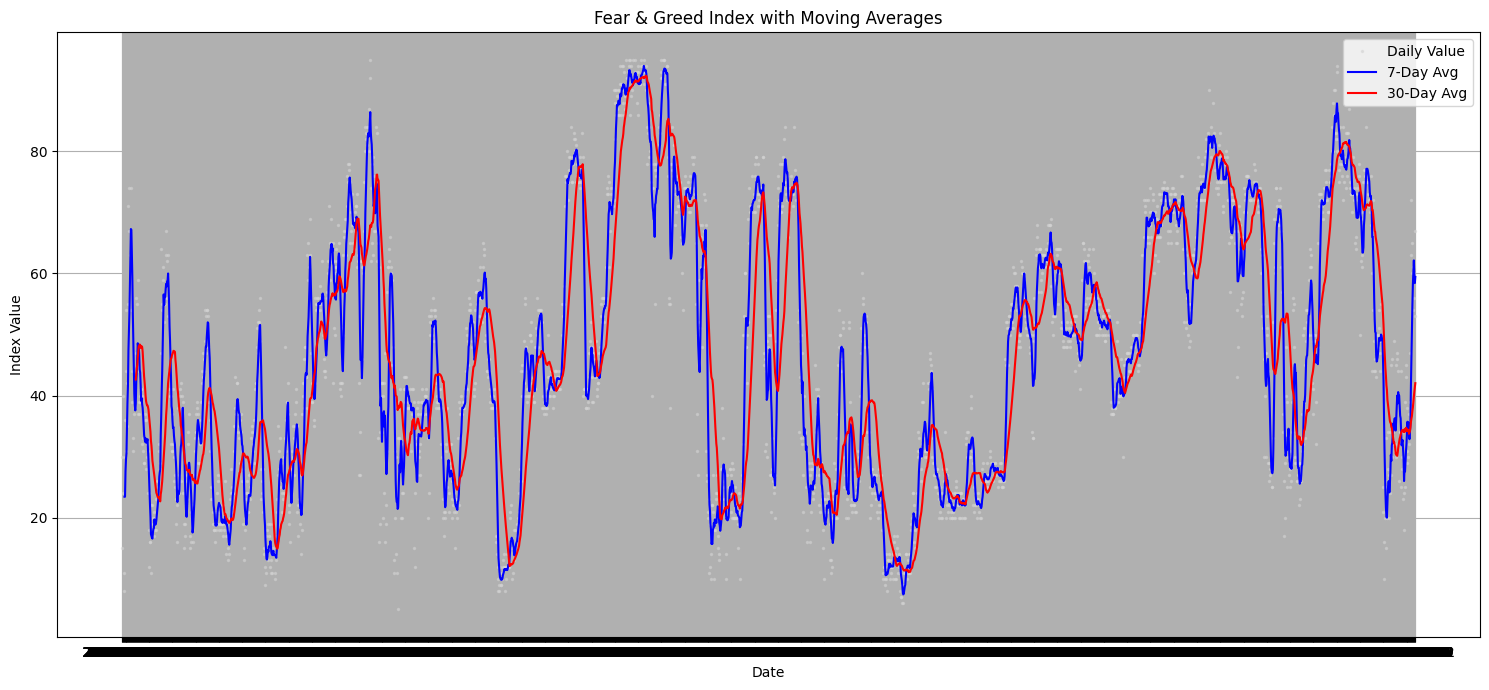

In [ ]:
# 5. Time Series with Moving Averages
plt.figure(figsize=(15, 7))
plt.plot(df_fgi.index, df_fgi['value'], marker='o', linestyle='', markersize=1.5, alpha=0.5, label='Daily Value', color='lightgray')
plt.plot(df_fgi.index, df_fgi['value_7day_avg'], label='7-Day Avg', color='blue')
plt.plot(df_fgi.index, df_fgi['value_30day_avg'], label='30-Day Avg', color='red')
plt.title('Fear & Greed Index with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Data Loading & Initial Inspection
Loaded from Google Sheets into df_fgi with 2644 rows and 4 columns: timestamp, value, classification, date

All columns initially of object dtype

🧼 Data Cleaning Highlights
No missing or empty rows found after checking with .isnull().sum() and np.nan substitution

Converted:

timestamp → int64

value → Int64 (nullable int)

date → datetime64[ns]

No duplicate entries found (based on timestamp and date)

Dataset sorted chronologically by timestamp with reset index

📊 Exploratory Data Analysis (EDA)
Summary Statistics
value range: 5 to 95

Mean ≈ 47, Mode = 50

Distribution
Histogram: Bell-shaped with central peak between 40–60 (Neutral zone)

Box Plot: Symmetric spread, no clear outliers detected

Time Series Aspect
Spans from Feb 2018 to May 2025

Unique date entries per row—suggests consistent daily data

Bivariate/Multivariate
Value Over Time: Time series plot shows market sentiment volatility over years

Value by Classification: Box plots validate correct classification alignment (e.g., Extreme Fear = lower values, Extreme Greed = higher values)

Feature Engineering:

Added: value_7day_avg, value_30day_avg, daily_change

Correlation Matrix shows:

Strong positive correlation between value and its moving averages

Low correlation with daily_change—signals that daily changes capture short-term volatility

graph TD
    A[Start] --> B(Data Loading & Initial Inspection);
    B --> C(Data Cleaning & Handling);
    C --> D(Explore Data Characteristics - EDA);
    D --> E(Univariate Analysis);
    D --> F(Bivariate & Multivariate Analysis);
    C --> G(Handle Rows with Missing Values);
    C --> H(Check for Duplicates);
    H --> I(Sort Data & Reset Index);
    E --> J{Distribution Analysis};
    E --> K{Summary Statistics};
    F --> L{Value over Time Plot};
    F --> M{Value by Classification Box Plot};
    F --> N(Feature Engineering);
    N --> O{Add Moving Averages};
    N --> P{Add Daily Change};
    N --> Q{Correlation Matrix};
    I --> J;
    I --> K;
    I --> L;
    I --> M;
    Q --> R(Analyze Correlations);
    R --> S[End];
    J --> S;
    K --> S;
    L --> S;
    M --> S;
    O --> Q;
    P --> Q;